# COVID-19 Outcome Prediction

### Importing All needed Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.svm import SVC
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve, classification_report

### Read data from CSV File

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df.sample(10)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
673,45,13,1,47.0,0,1,6,31,19,12,3,1,1,0
602,12,12,1,49.4,0,0,14,31,19,12,3,1,0,0
436,108,24,0,59.0,0,0,14,31,19,12,3,1,0,0
663,121,30,2,49.4,0,0,14,31,19,12,3,1,0,0
433,108,24,1,30.0,0,0,14,31,19,12,3,1,0,0
582,107,2,0,60.0,0,1,14,31,19,12,3,1,0,1
454,108,24,0,34.0,0,0,14,31,19,12,3,1,0,0
26,83,8,1,29.0,1,0,14,31,19,12,3,1,0,0
684,63,13,0,56.0,0,0,6,31,19,12,3,1,0,0
595,124,7,1,45.0,0,0,14,31,19,12,3,1,0,0


Separate features and results (labels) from one another

In [3]:
X = df[df.columns[:-1]]
y = df.values[:,-1]
X.shape, y.shape

((863, 13), (863,))

### Explore Data

In [4]:
features = df.columns[:-1]
features

Index(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos'],
      dtype='object')

In [5]:
df['result'].value_counts()

0    755
1    108
Name: result, dtype: int64

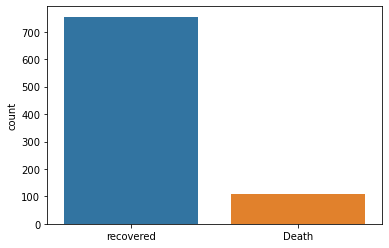

In [6]:
sb.countplot(y).set_xticklabels(['recovered', 'Death']) 
mp.show()

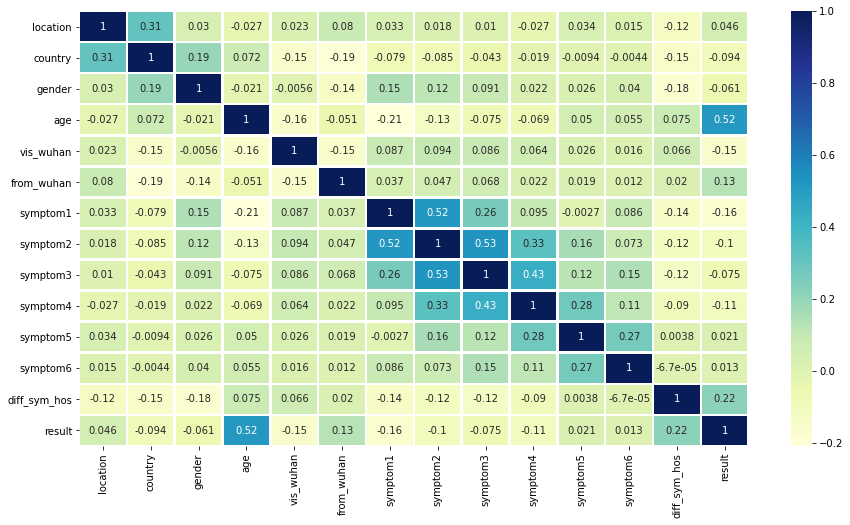

In [7]:
# Sample figsize in inches  
fig, ax = mp.subplots(figsize=(15,8)) 

# Colors
cmap="YlGnBu"

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), linewidths=1.5, cmap=cmap, annot=True, ax=ax)  

#save image 
figure = dataplot.get_figure()    
figure.savefig('correlations.png', dpi=800)
# features with the highest correlations with the result are:
# 'age','symptom1','symptom2','symptom3','symptom4', 'vis_wuhan', 'from_wuhan' and 'diff_sym_hos'

### Split dataset into train and test sets

In [8]:
# features = ['age','gender','symptom1','symptom2','symptom3','symptom4','vis_wuhan', 'from_wuhan', 'diff_sym_hos']

# X = df[features].values

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state= 3, shuffle = True, stratify=y)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((604, 13), (259, 13), (604,), (259,))

In [9]:
# Normalize data
scaler = StandardScaler()
scaler.fit(Xtr)
Xtr=scaler.transform(Xtr)
Xts=scaler.transform(Xts)

In [10]:
# check for null values
pd.DataFrame(Xtr).isnull().values.any()

False

### Some User-defined functions

The *evaluate_tr_ts_metrics* function calculates the evaluation metrics for training and testing of a model

In [11]:
def evaluate_tr_ts_metrics(predicted_ts, predicted_tr):
    
    # metrics for training
    accuracy_tr = accuracy_score(ytr,predicted_tr)
    precision_tr = precision_score(ytr,predicted_tr)
    recall_tr = recall_score(ytr,predicted_tr)
    f1_tr = f1_score(ytr,predicted_tr)
    roc_auc_tr = roc_auc_score(ytr,predicted_tr) 

    # metrics for testing
    accuracy_ts = accuracy_score(yts,predicted_ts)
    precision_ts = precision_score(yts,predicted_ts)
    recall_ts = recall_score(yts,predicted_ts)
    f1_ts = f1_score(yts,predicted_ts)
    roc_auc_ts = roc_auc_score(yts,predicted_ts) 
    
    # print results in the form of a table
    table = [[accuracy_tr, precision_tr, recall_tr, f1_tr, roc_auc_tr], [accuracy_ts, precision_ts, recall_ts, f1_ts, roc_auc_ts]]
    DT_metrics = pd.DataFrame(table, columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC_Score'], index=['train', 'test'])
    return DT_metrics

The *compare_models_metrics* calculates the evaluation metrics in testing phase for all models into a table for comparison

In [12]:
def compare_models_metrics():
    
    # Decision Tree metrics
    accuracy_ts = accuracy_score(yts,ts_pred_dt)
    precision_ts = precision_score(yts,ts_pred_dt)
    recall_ts = recall_score(yts,ts_pred_dt)
    f1_ts = f1_score(yts,ts_pred_dt)
    roc_auc_ts = roc_auc_score(yts,ts_pred_dt)
    
    # KNN metrics
    accuracy_knn = accuracy_score(yts,ts_pred_knn)
    precision_knn = precision_score(yts,ts_pred_knn)
    recall_knn = recall_score(yts,ts_pred_knn)
    f1_knn = f1_score(yts,ts_pred_knn)
    roc_auc_knn = roc_auc_score(yts,ts_pred_knn)
    
    # Logistic Regression metrics
    accuracy_logreg = accuracy_score(yts,ts_pred_logreg)
    precision_logreg = precision_score(yts,ts_pred_logreg)
    recall_logreg = recall_score(yts,ts_pred_logreg)
    f1_logreg = f1_score(yts,ts_pred_logreg)
    roc_auc_logreg = roc_auc_score(yts,ts_pred_logreg)
    
    # Naive Bayes metrics
    accuracy_NB = accuracy_score(yts,ts_pred_NB)
    precision_NB = precision_score(yts,ts_pred_NB)
    recall_NB = recall_score(yts,ts_pred_NB)
    f1_NB = f1_score(yts,ts_pred_NB)
    roc_auc_NB = roc_auc_score(yts,ts_pred_NB)
    
    # SVM metrics
    accuracy_SVM = accuracy_score(yts,ts_pred_SVM)
    precision_SVM = precision_score(yts,ts_pred_SVM)
    recall_SVM = recall_score(yts,ts_pred_SVM)
    f1_SVM = f1_score(yts,ts_pred_SVM)
    roc_auc_SVM = roc_auc_score(yts,ts_pred_SVM)
    
    # print results in the form of a table
    table = [[accuracy_ts, precision_ts, recall_ts, f1_ts, roc_auc_ts], 
             [accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn], 
             [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg],
             [accuracy_NB, precision_NB, recall_NB, f1_NB, roc_auc_NB],
             [accuracy_SVM, precision_SVM, recall_SVM, f1_SVM, roc_auc_SVM]
            ]
    DT_metrics = pd.DataFrame(table, columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC_Score'], index=['Decision Tree', 'KNN', 'Logistic Regression','Naive Bayes', 'SVM'])
    return DT_metrics

The *plot_ROC* function plots the ROC Curve for a model

In [13]:
def plot_ROC(predicted_ts):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(yts))]
    # calculate roc auc scores
    ns_auc = roc_auc_score(yts, ns_probs)
    
    # obtain FP, TP and threshold values
    ns_fpr, ns_tpr, _ = roc_curve(yts, ns_probs)
    fpr, tpr, threshold = roc_curve(yts,predicted_ts)
    
    # plot roc curve
    mp.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    mp.plot(fpr,tpr, label=f"AUC= {roc_auc_score(yts,predicted_ts):.5f}")
    
    mp.xlabel("False Positive Rate")
    mp.ylabel("Positive Positive Rate")
    mp.grid(True)
    mp.title("Roc Curve")
    mp.legend(loc="lower right")

The *plot_PR_curve* function plots the Precision Recall Curve for a model

In [14]:
def plot_PR_curve(model):
    # Predict probability
    y_prob_tr = model.predict_proba(Xtr)[:,1]
    y_prob_ts = model.predict_proba(Xts)[:,1]
    
    # plot precision recall curve
    prec_tr, rec_tr, thres_tr = precision_recall_curve(ytr, y_prob_tr)
    prec_ts, rec_ts, thres_ts = precision_recall_curve(yts, y_prob_ts)
    mp.figure(figsize=(8,5))
    no_skill = len(yts[yts==1]) / len(yts)
    mp.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    mp.plot(rec_tr, prec_tr, 'b', label="train")
    mp.plot(rec_ts, prec_ts, 'r', label="test")
    mp.ylabel("Precision")
    mp.xlabel("Recall")
    mp.title("Precision-Recall curve");
    mp.grid(True)
    mp.legend()

## Decision Tree Classifier

### Tune Decision Tree Hyperparameters Using Grid Search

In [15]:
DT_model = DecisionTreeClassifier()

# prepare the list of values for all hyperparameters
DT_params = {
    'max_depth': range(1,5),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["entropy", "gini"]
}

# find the best hyperparameter by performing grid search
grid_search = GridSearchCV(estimator=DT_model, 
                           param_grid=DT_params, 
                           cv=10, 
                           verbose=1, 
                           n_jobs=-1, 
                           scoring=["accuracy","f1","precision","recall","roc_auc"],
                           refit="accuracy"
                          )

# Train Decision Tree Model
grid_search.fit(Xtr,ytr)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
             verbose=1)

### Evaluate The Decision Tree Model

In [16]:
# predict train and test sets
ts_pred_dt = grid_search.predict(Xts)
tr_pred_dt = grid_search.predict(Xtr)
evaluate_tr_ts_metrics(predicted_ts=ts_pred_dt, predicted_tr=tr_pred_dt)

,Accuracy,Precision,Recall,F1 Score,AUC_Score
train,0.948675,0.784810,0.815789,0.80000,0.891796
test,0.949807,0.771429,0.843750,0.80597,0.904254


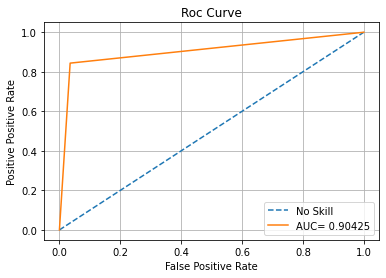

In [17]:
plot_ROC(predicted_ts=ts_pred_dt)

### Plot Confusion matrix

In [18]:
conf_mat = confusion_matrix(yts,ts_pred_dt,normalize="all")

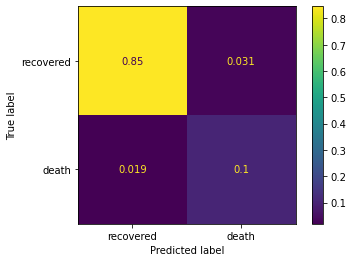

In [19]:
ConfusionMatrixDisplay(conf_mat, display_labels=["recovered","death"]).plot()

In [20]:
print(f'After Grid Search:\nbest score = {grid_search.best_score_}')
print(f'best model = {grid_search.best_estimator_}')
print(f'best parameters = {grid_search.best_params_}')

After Grid Search:
best score = 0.9470491803278687
best model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
best parameters = {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


In [21]:
results = grid_search.cv_results_

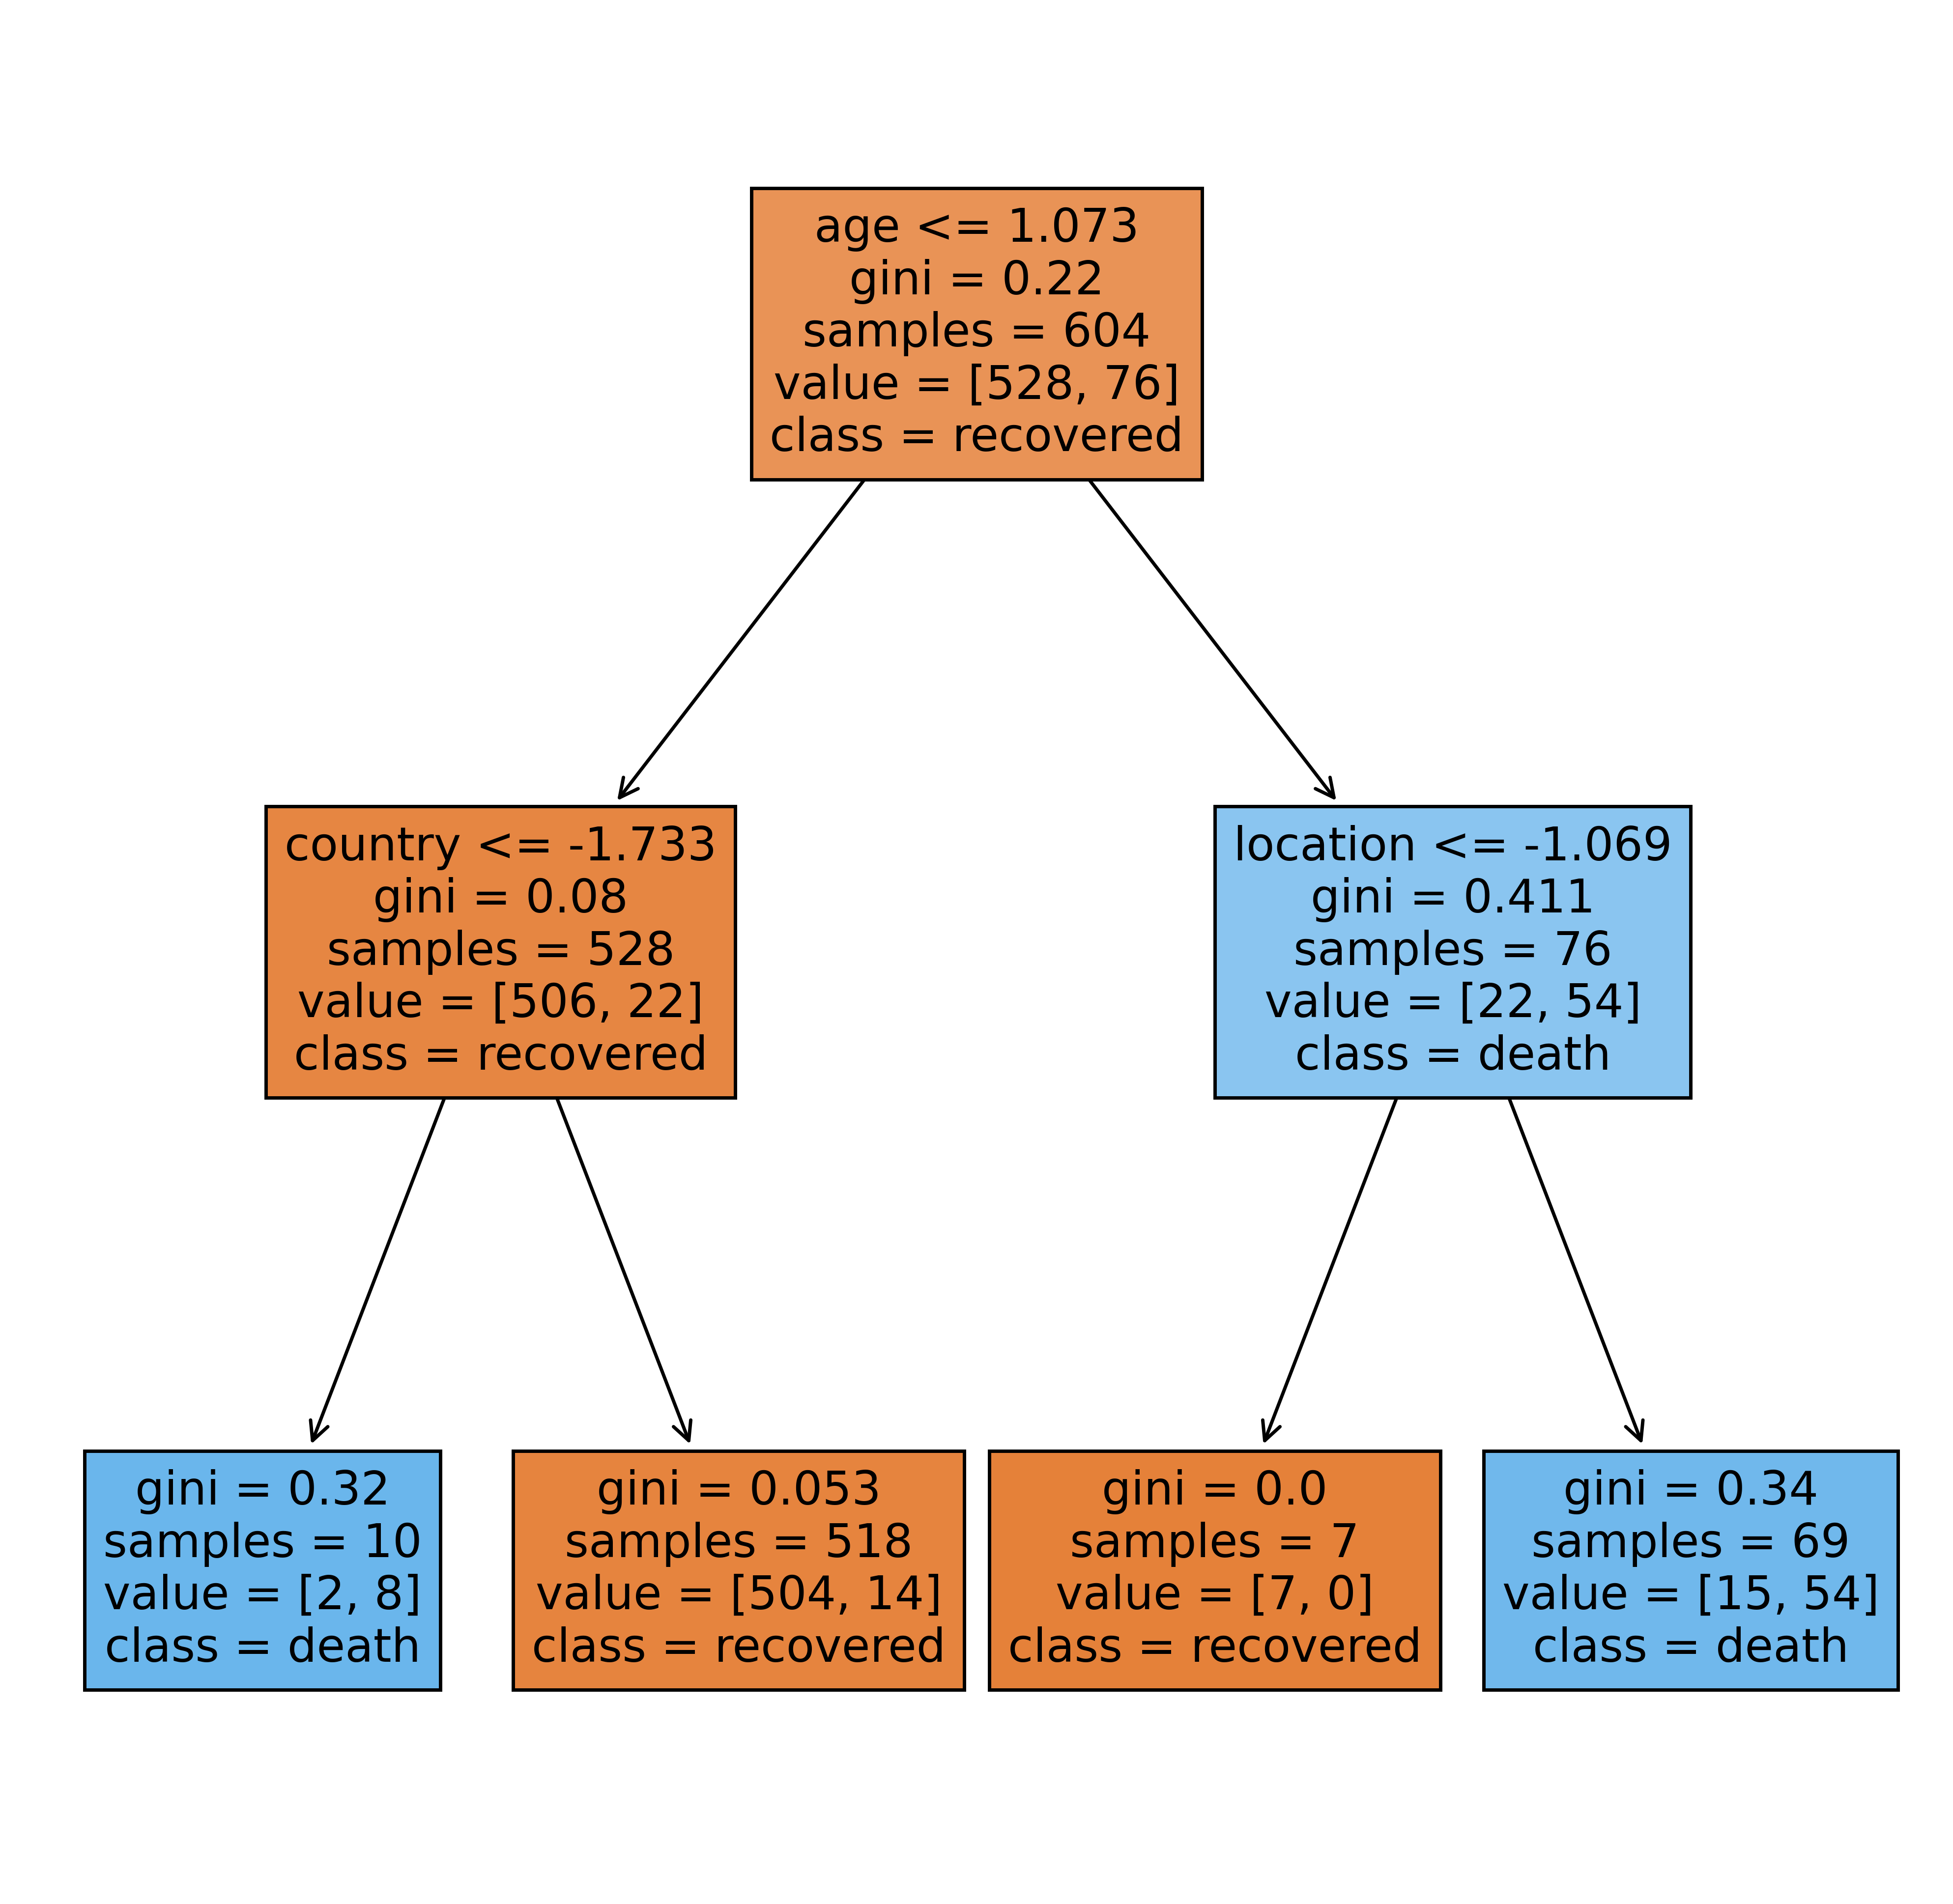

In [22]:
cn = ["recovered","death"]
fig, axes = mp.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)
plot_tree(grid_search.best_estimator_,
               feature_names = features, 
               class_names=cn,
               filled = True)
fig.savefig('DecisionTree.png')

### Plot Decision Tree Precision-Recall Curve

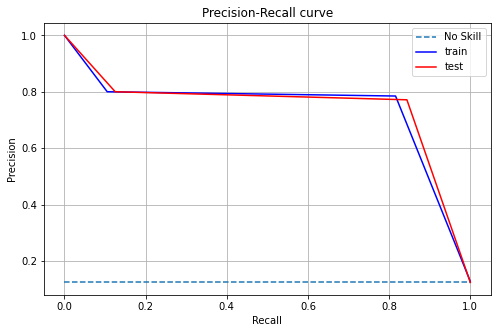

In [23]:
plot_PR_curve(model=grid_search)

## KNN Classifier

### Tune KNN Hyperparameters Using Grid Search

In [24]:
knn_model = KNeighborsClassifier(metric = 'minkowski')

# prepare the list of values for all hyperparameters
knn_params = {
    "n_neighbors": range(1,31),
    'weights': ['uniform', 'distance']
}

# find the best hyperparameter by performing grid search
grid_search_knn = GridSearchCV(estimator=knn_model, 
                           param_grid=knn_params, 
                           cv=10, 
                           verbose=1, 
                           n_jobs=-1, 
                           scoring=["accuracy","f1","precision","recall","roc_auc"],
                           refit="accuracy"
                          )

# Train Decision Tree Model
grid_search_knn.fit(Xtr,ytr)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
             verbose=1)

### Evaluate the KNN Model

In [25]:
# predict train and test sets
ts_pred_knn = grid_search_knn.predict(Xts)
tr_pred_knn = grid_search_knn.predict(Xtr)
evaluate_tr_ts_metrics(predicted_ts=ts_pred_knn, predicted_tr=tr_pred_knn)

,Accuracy,Precision,Recall,F1 Score,AUC_Score
train,1.000000,1.00,1.00000,1.000000,1.000000
test,0.945946,0.95,0.59375,0.730769,0.794672


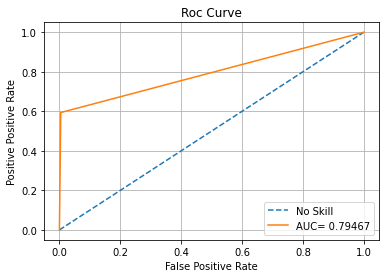

In [26]:
plot_ROC(predicted_ts=ts_pred_knn)

### Plot Confusion Matrix

In [27]:
conf_mat = confusion_matrix(yts,ts_pred_knn,normalize="all")

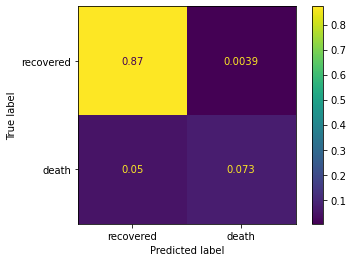

In [28]:
ConfusionMatrixDisplay(conf_mat, display_labels=["recovered","death"]).plot()

In [29]:
print(f'After Grid Search:\nbest score = {grid_search_knn.best_score_}')
print(f'best model = {grid_search_knn.best_estimator_}')
print(f'best parameters = {grid_search_knn.best_params_}')

After Grid Search:
best score = 0.9305464480874317
best model = KNeighborsClassifier(n_neighbors=9, weights='distance')
best parameters = {'n_neighbors': 9, 'weights': 'distance'}


### Plot KNN Precision-Recall Curve

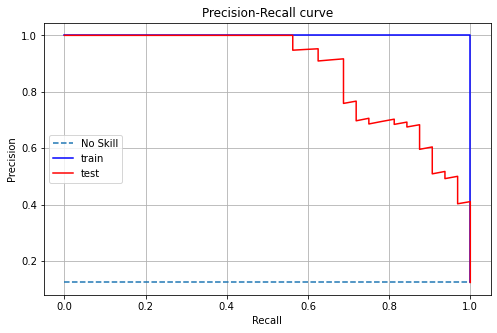

In [30]:
plot_PR_curve(model=grid_search_knn)

## Logistic Regression Classifier

### Tune Logistic Regression Hyperparameters Using Grid Search

In [31]:
logreg_model=LogisticRegression()

logreg_params = {
    'penalty' : ['l2'], # l1 lasso l2 ridge
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

# find the best hyperparameter by performing grid search
grid_search_logreg = GridSearchCV(estimator=logreg_model, 
                           param_grid=logreg_params, 
                           cv=10, 
                           verbose=1, 
                           n_jobs=-1, 
                           scoring=["accuracy","f1","precision","recall","roc_auc"],
                           refit="accuracy"
                          )

# Train Decision Tree Model
grid_search_logreg.fit(Xtr,ytr)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
             verbose=1)

### Evaluate LR Model

In [32]:
# predict train and test sets
ts_pred_logreg = grid_search_logreg.predict(Xts)
tr_pred_logreg = grid_search_logreg.predict(Xtr)
evaluate_tr_ts_metrics(predicted_ts=ts_pred_logreg, predicted_tr=tr_pred_logreg)

,Accuracy,Precision,Recall,F1 Score,AUC_Score
train,0.948675,0.868852,0.697368,0.773723,0.841108
test,0.945946,0.875000,0.656250,0.750000,0.821517


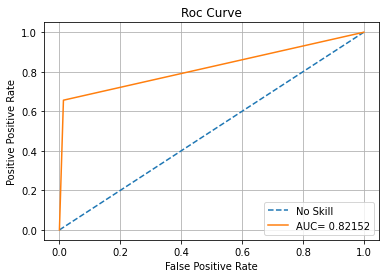

In [33]:
plot_ROC(predicted_ts=ts_pred_logreg)

### Plot Confusion Matrix

In [34]:
conf_mat = confusion_matrix(yts,ts_pred_logreg,normalize="all")

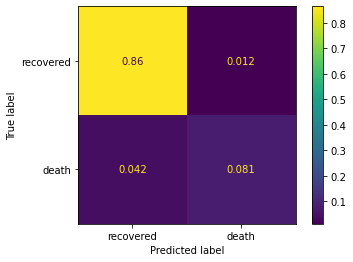

In [35]:
ConfusionMatrixDisplay(conf_mat, display_labels=["recovered","death"]).plot()

In [36]:
print(f'After Grid Search:\nbest score = {grid_search_logreg.best_score_}')
print(f'best model = {grid_search_logreg.best_estimator_}')
print(f'best parameters = {grid_search_logreg.best_params_}')

After Grid Search:
best score = 0.9388524590163934
best model = LogisticRegression(solver='liblinear')
best parameters = {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


### Plot LR Precision-Recall Curve

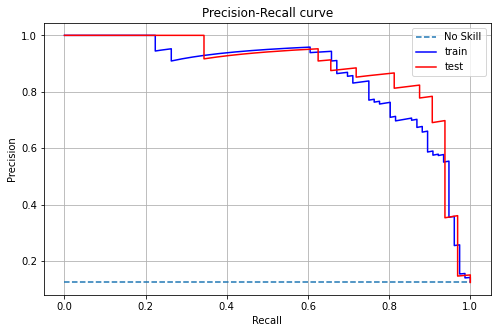

In [37]:
plot_PR_curve(model=grid_search_logreg)

## Naive Bayes Classifier

## Tune Naive Bayes Hyperparameters Using Grid Search 

In [38]:
NB_model = GaussianNB()

NB_params = {
    'var_smoothing': np.logspace(-9,9, num=100)
}

# find the best hyperparameter by performing grid search
grid_search_NB = GridSearchCV(estimator=NB_model, 
                           param_grid=NB_params, 
                           cv=10, 
                           verbose=1, 
                           n_jobs=-1, 
                           scoring=["accuracy","f1","precision","recall","roc_auc"],
                           refit="accuracy"
                          )

# Train Decision Tree Model
grid_search_NB.fit(Xtr,ytr)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-09, 1.51991108e-09, 2.31012970e-09, 3.51119173e-09,
       5.33669923e-09, 8.11130831e-09, 1.23284674e-08, 1.87381742e-08,
       2.84803587e-08, 4.32876128e-08, 6.57933225e-08, 1.00000000e-07,
       1.51991108e-07, 2.31012970e-07, 3.51119173e-07, 5.33669923e-07,
       8.11130831e-07, 1.232846...
       3.51119173e+05, 5.33669923e+05, 8.11130831e+05, 1.23284674e+06,
       1.87381742e+06, 2.84803587e+06, 4.32876128e+06, 6.57933225e+06,
       1.00000000e+07, 1.51991108e+07, 2.31012970e+07, 3.51119173e+07,
       5.33669923e+07, 8.11130831e+07, 1.23284674e+08, 1.87381742e+08,
       2.84803587e+08, 4.32876128e+08, 6.57933225e+08, 1.00000000e+09])},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
             verbose=1)

## Evaluate Naive Bayes Model

In [39]:
# predict train and test sets
ts_pred_NB = grid_search_NB.predict(Xts)
tr_pred_NB = grid_search_NB.predict(Xtr)
evaluate_tr_ts_metrics(predicted_ts=ts_pred_NB, predicted_tr=tr_pred_NB)

,Accuracy,Precision,Recall,F1 Score,AUC_Score
train,0.887417,0.617647,0.276316,0.381818,0.625847
test,0.911197,0.736842,0.437500,0.549020,0.707737


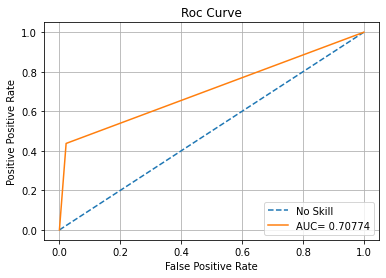

In [40]:
plot_ROC(predicted_ts=ts_pred_NB)

### Plot Confusion Matrix

In [41]:
conf_mat = confusion_matrix(yts,ts_pred_NB,normalize="all")

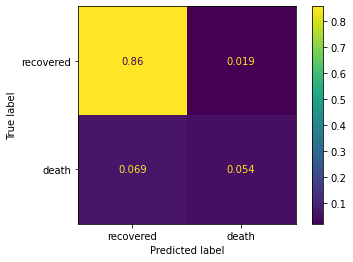

In [42]:
ConfusionMatrixDisplay(conf_mat, display_labels=["recovered","death"]).plot()

In [43]:
print(f'After Grid Search:\nbest score = {grid_search_NB.best_score_}')
print(f'best model = {grid_search_NB.best_estimator_}')
print(f'best parameters = {grid_search_NB.best_params_}')

After Grid Search:
best score = 0.8774590163934427
best model = GaussianNB(var_smoothing=1.2328467394420684)
best parameters = {'var_smoothing': 1.2328467394420684}


### Plot LR Precision-Recall Curve

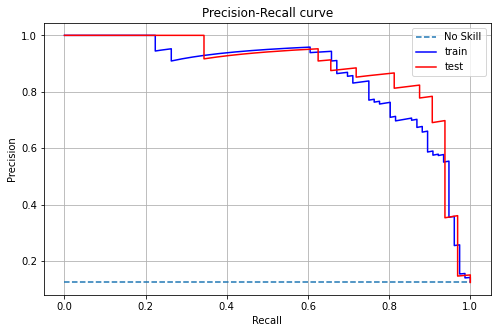

In [44]:
plot_PR_curve(model=grid_search_logreg)

## SVM Classifier

### Tune SVM Hyperparameters Using Grid Search

In [45]:
# del SVM_model
# del grid_search_SVM

In [46]:
SVM_model = SVC()

# defining parameter range
SVM_params = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'probability': [True]
}

# find the best hyperparameter by performing grid search
grid_search_SVM = GridSearchCV(estimator=SVM_model, 
                           param_grid=SVM_params, 
                           cv=10, 
                           verbose=1, 
                           n_jobs=-1, 
                           scoring="accuracy",
                           refit="accuracy"
                          )

# Train Decision Tree Model
grid_search_SVM.fit(Xtr,ytr)


Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf'], 'probability': [True]},
             refit='accuracy', scoring='accuracy', verbose=1)

### Evaluate the SVM Model

In [47]:
# predict train and test sets
ts_pred_SVM = grid_search_SVM.best_estimator_.predict(Xts)
tr_pred_SVM = grid_search_SVM.best_estimator_.predict(Xtr)
evaluate_tr_ts_metrics(predicted_ts=ts_pred_SVM, predicted_tr=tr_pred_SVM)

,Accuracy,Precision,Recall,F1 Score,AUC_Score
train,1.000000,1.000000,1.00000,1.000000,1.000000
test,0.965251,0.870968,0.84375,0.857143,0.913064


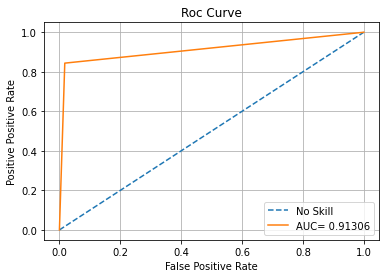

In [48]:
plot_ROC(predicted_ts=ts_pred_SVM)

### Plot Confusion Matrix

In [49]:
conf_mat = confusion_matrix(yts,ts_pred_SVM,normalize="all")

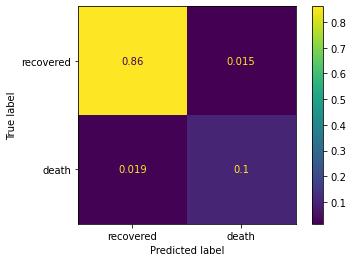

In [50]:
ConfusionMatrixDisplay(conf_mat, display_labels=["recovered","death"]).plot()

In [51]:
print(f'After Grid Search:\nbest score = {grid_search_SVM.best_score_}')
print(f'best model = {grid_search_SVM.best_estimator_}')
print(f'best parameters = {grid_search_SVM.best_params_}')

After Grid Search:
best score = 0.9603551912568304
best model = SVC(C=1000, gamma=0.1, probability=True)
best parameters = {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}


### Plot SVM Precision-Recall Curve

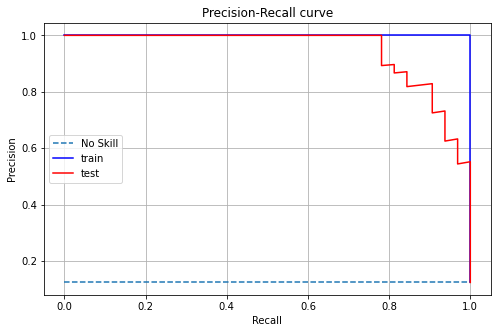

In [52]:
plot_PR_curve(model=grid_search_SVM)

## Compare between Classifiers

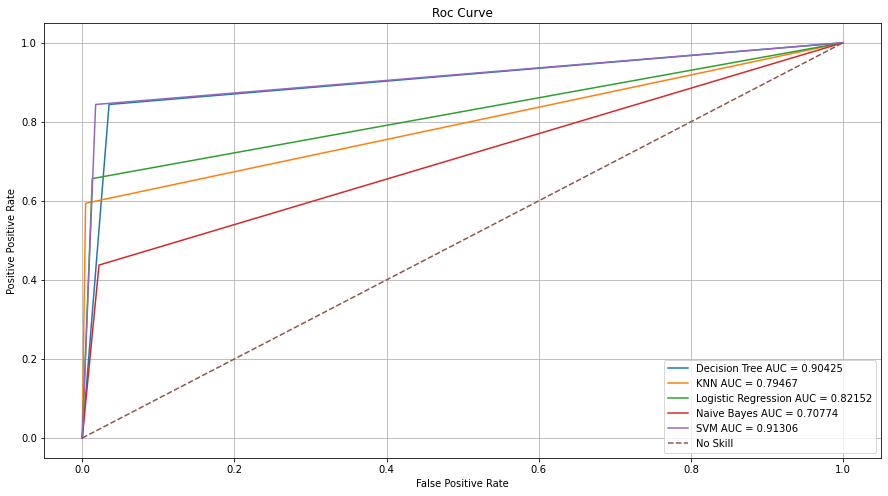

In [53]:
fpr, tpr, threshold = roc_curve(yts,ts_pred_dt)
mp.figure(figsize=(15,8))
mp.plot(fpr,tpr, label=f"Decision Tree AUC = {roc_auc_score(yts,ts_pred_dt):.5f}")
fpr, tpr, threshold = roc_curve(yts,ts_pred_knn)
mp.plot(fpr,tpr, label=f"KNN AUC = {roc_auc_score(yts,ts_pred_knn):.5f}")
fpr, tpr, threshold = roc_curve(yts,ts_pred_logreg)
mp.plot(fpr,tpr, label=f"Logistic Regression AUC = {roc_auc_score(yts,ts_pred_logreg):.5f}")
fpr, tpr, threshold = roc_curve(yts,ts_pred_NB)
mp.plot(fpr,tpr, label=f"Naive Bayes AUC = {roc_auc_score(yts,ts_pred_NB):.5f}")
fpr, tpr, threshold = roc_curve(yts,ts_pred_SVM)
mp.plot(fpr,tpr, label=f"SVM AUC = {roc_auc_score(yts,ts_pred_SVM):.5f}")

ns_probs = [0 for _ in range(len(yts))]
ns_auc = roc_auc_score(yts, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(yts, ns_probs)
mp.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

mp.xlabel("False Positive Rate")
mp.ylabel("Positive Positive Rate")
mp.grid(True)
mp.title("Roc Curve")
mp.legend(loc="lower right")

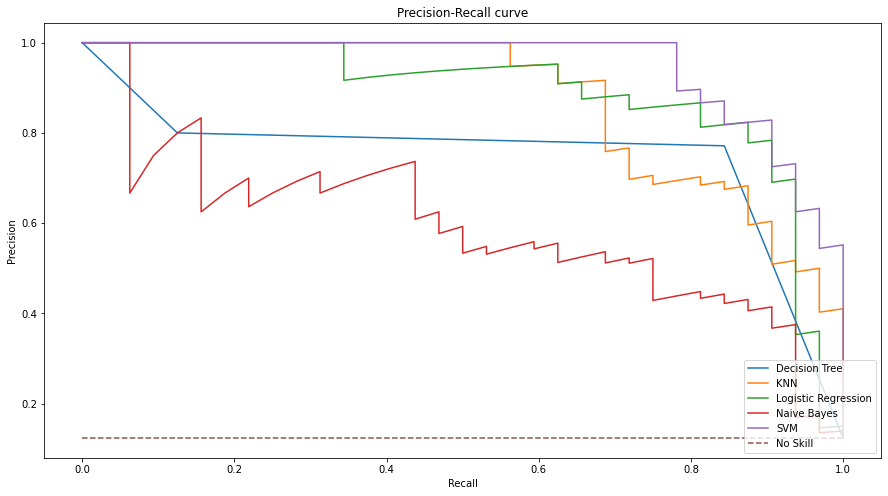

In [54]:
    mp.figure(figsize=(15,8))
    # Predict testing probability of decision tree
    y_prob_ts = grid_search.predict_proba(Xts)[:,1]
    
    # plot precision recall curve of decision tree
    prec_ts, rec_ts, thres_ts = precision_recall_curve(yts, y_prob_ts)
    mp.plot(rec_ts, prec_ts, label="Decision Tree")
    
    # Repeat for the remaining 4 classifiers
    y_prob_ts = grid_search_knn.predict_proba(Xts)[:,1]
    prec_ts, rec_ts, thres_ts = precision_recall_curve(yts, y_prob_ts)
    mp.plot(rec_ts, prec_ts, label="KNN")
    
    y_prob_ts = grid_search_logreg.predict_proba(Xts)[:,1]
    prec_ts, rec_ts, thres_ts = precision_recall_curve(yts, y_prob_ts)
    mp.plot(rec_ts, prec_ts, label="Logistic Regression")
    
    y_prob_ts = grid_search_NB.predict_proba(Xts)[:,1]
    prec_ts, rec_ts, thres_ts = precision_recall_curve(yts, y_prob_ts)
    mp.plot(rec_ts, prec_ts, label="Naive Bayes")
    
    y_prob_ts = grid_search_SVM.predict_proba(Xts)[:,1]
    prec_ts, rec_ts, thres_ts = precision_recall_curve(yts, y_prob_ts)
    mp.plot(rec_ts, prec_ts, label="SVM")
    
    no_skill = len(yts[yts==1]) / len(yts)
    mp.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    
    mp.ylabel("Precision")
    mp.xlabel("Recall")
    mp.title("Precision-Recall curve");
    mp.legend(loc="lower right")

In [55]:
compare_models_metrics()

,Accuracy,Precision,Recall,F1 Score,AUC_Score
Decision Tree,0.949807,0.771429,0.84375,0.805970,0.904254
KNN,0.945946,0.950000,0.59375,0.730769,0.794672
Logistic Regression,0.945946,0.875000,0.65625,0.750000,0.821517
Naive Bayes,0.911197,0.736842,0.43750,0.549020,0.707737
SVM,0.965251,0.870968,0.84375,0.857143,0.913064
